## Customer Churn - Exploratory Data Analysis (EDA)

Understanding why customers leave and identifying the associated patterns and trends is important for any business owner. 
<br>Customer churn directly impacts business revenue and profitability. 

Insights into customer churn can aid business owners with developing strategies, decision making and preventing future losses.

This notebook sets out to accomplish the following:

1. Identify and visualize which factors may contribute to customer churn

2. Prepare the data for predictive modelling

In [1874]:
# Packages used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Load Datasets

Two datasets from a bank were used: (1) customer information and (2) account information.

Source @ https://mavenanalytics.io/data-playground?order=date_added%2Cdesc&search=bank

### Bank Customer Dataset


`CustomerId`: Unique customer identifier

`Surname`: The customer's last name

`CreditScore`: A numerical value representing the customer's credit score

`Geography`: The country where the customer resides

`Gender`: The customer's gender

`Age`: The customer's age

`Tenure`: The number of years the customer has been with the bank

`EstimatedSalary`: The estimated salary of the customer


In [1875]:
customers = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name=0)
customers.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57


In [1876]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


### Bank Accounts Dataset

`CustomerId`: Unique customer identifier

`Balance`: The customer's account balance

`NumOfProducts`: The number of bank products the customer uses (e.g., savings account, credit card)

`HasCrCard`: Whether the customer has a credit card (yes, no)

`Tenure`: The number of years the customer has been with the bank

`IsActiveMember`: Whether the customer is an active member (yes,  no)

`Exited`: Whether the customer has churned (1 = yes, 0 = no)

In [1877]:
accounts = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name=1)
accounts.head(3)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0


### Merge both datasets

Both datasets contain `Customer Id` so they can be joined based on this metric. 

The `Tenure` column is redundant, it can be included in the join to avoid generating a duplicate.

In [1878]:
bank = customers.merge(accounts, how = 'left', on = ["CustomerId", "Tenure"])

In [1879]:
bank.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0


<div style="background-color:#cce7c9; padding: 10px; border-radius: 5px;">

**Merge successful** - we can now easily move onto cleaning the dataset.

## Part 2 - Inspecting and Cleaning

Inspecting each variable is the bulk of any data analysis project. 

We want to screen for duplicated data, missing data, outliers, typos and correct data types. <br>Fixing any issues and noting interesting details as we go.

### Inspect data types

In [1880]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


The following changes can be made:


- `Estimated Salary` and `Balance` both need to be converted to a integer and have the euro sign removed.

In [1881]:
bank["EstimatedSalary"] = bank["EstimatedSalary"].str.replace("€", "").astype("float")
bank["Balance"] = bank["Balance"].str.replace("€", "").astype("float")

In [1882]:
bank.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0


<div style="background-color:#cce7c9; padding: 10px; border-radius: 5px;">

Currency variables are now integers that can be used in calculations.

### Check for Typos and Inconsistent Categories

The `Geography` and `Gender` are categorical variables, it is important to check that data entry was consistent.

In [1883]:
bank["Geography"].value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1658
FRA        1619
Name: count, dtype: int64

In [1884]:
# Need to combine FRA and French into France

bank["Geography"] = np.where(bank["Geography"] == "FRA", "France", bank["Geography"])
bank["Geography"] = np.where(bank["Geography"] == "French", "France", bank["Geography"])

In [1885]:
bank["Geography"].value_counts()
# Customers are from three countries, germany, spain and france.

Geography
France     5018
Germany    2509
Spain      2477
Name: count, dtype: int64

In [1886]:
bank["Gender"].value_counts()
# Looks good

Gender
Male      5457
Female    4547
Name: count, dtype: int64

<div style="background-color:#cce7c9; padding: 10px; border-radius: 5px;">

Customers are from three `Geography` regions: Germany, Spain and France.

`Gender` is divided into two categories, male and female.

### Check for duplicate rows

Duplicated data creates inaccuracies in calculations and may mislead reporting.

By ensuring that each row is unique we can be confident in the quality of our dataset.

In [1887]:
bank.duplicated().sum()

4

In [1888]:
bank[bank.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
1,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
10001,15628319,Walker,792,France,Female,28.0,4,38190.78,130142.79,1,No,No,0
10002,15628319,Walker,792,France,Female,28.0,4,38190.78,130142.79,1,No,No,0
10003,15628319,Walker,792,France,Female,28.0,4,38190.78,130142.79,1,No,No,0


In [1889]:
bank.shape

(10004, 13)

In [1890]:
bank.drop_duplicates(inplace=True)

In [1891]:
bank.shape

(10000, 13)

<div style="background-color:#cce7c9; padding: 10px; border-radius: 5px;">

Four rows of duplicated data were dropped.



### Missing Values and Outliers

The loss of information reduces the size of our dataset, depending on the amount of missing data it can impact stastical analysis. 

In [1892]:
bank.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

There are three rows with NaN's for `Surname` and `Age`

Let's isolate these rows and take a closer look:

In [1893]:
bank[bank["Surname"].isna()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


These rows have an unusual value for `EstimatedSalary`.

We may want to remove these, but let's first look at `EstimatedSalary` in more detail.

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

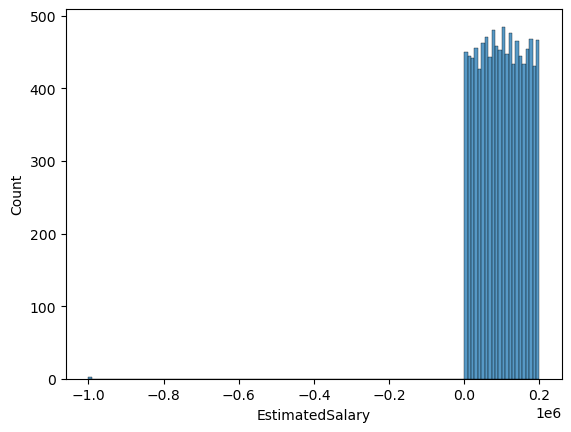

In [1894]:
sns.histplot(bank["EstimatedSalary"])

# we can clearly see those outliers.

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

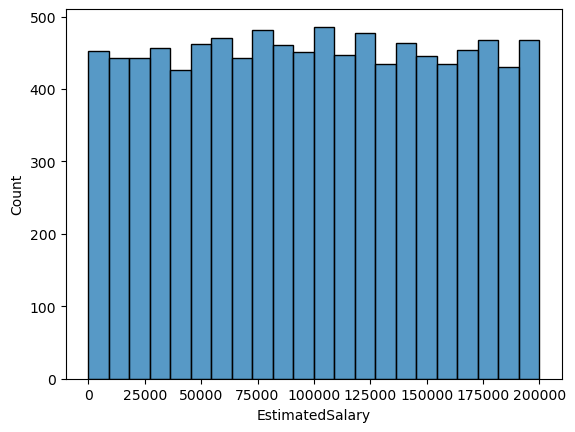

In [1895]:
# Take a look at the data without those low `EstimatedSalary` values

sns.histplot(bank.query("EstimatedSalary > 0"),
             x = "EstimatedSalary")


In [1896]:
bank.query("EstimatedSalary < 0")

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


Handling these missing values can be done a number of ways.

We can impute the data, for example using the median `Age` to replace NA's. 

There is no way to impute `Surname`, but it also is not a key variable we're worried about as it's unusable in numeric analysis and modelling.

We could also remove the rows entirely.

I've chosen to remove the rows, with the following arguments: 
1. These rows are outliers or errors for EstimatedSalary. Should it be 0? or impute the median?  With no way to know which is which, the safest is to remove them.
2. The distribution of `EstimatedSalary` is relatively uniform with no central tendency, so imputing values could bias the outcome.
3. Removing 3 customers out of 10,000 is a relatively small adjustment, unlikely to impact future analysis.

In [1897]:
# Drop rows with NAs
bank.dropna(inplace=True)

In [1898]:
# Reset index
bank.reset_index(inplace=True, drop=True)

In [1899]:
bank.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
2,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1


In [1900]:
bank.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [1901]:
# Now the there are no NaN values for Age it can be converted to a float (no decimal places)
bank["Age"].fillna(0).astype(int)

0       42
1       41
2       42
3       39
4       43
        ..
9992    39
9993    35
9994    36
9995    42
9996    28
Name: Age, Length: 9997, dtype: int32

<div style="background-color:#cce7c9; padding: 10px; border-radius: 5px;">

Three rows which contained missing information and outliers were omitted from the dataset.

## Part 3 - Exploratory Data Analysis (EDA) 

In [1902]:
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
2,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
3,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


### Distributions of numeric variables

<Axes: xlabel='Age', ylabel='Count'>

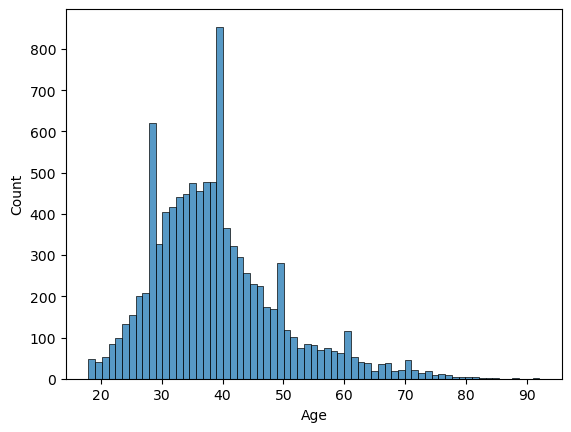

In [1903]:
sns.histplot(bank["Age"])

<div style="background-color:#cce7c9; padding: 10px; border-radius: 5px;">

`Age` has an interesting distribution with peaks around the decade marks (30, 40, 50, 60, 70), suggesting that binning may be useful for future analysis. 

A few outliers who are older than 85, but nothing to worry about right now.

<Axes: xlabel='CreditScore', ylabel='Count'>

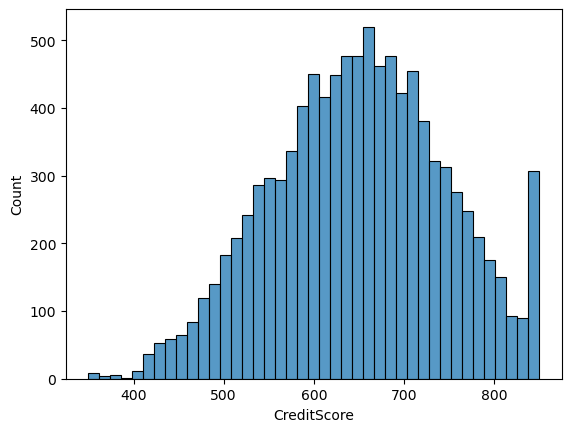

In [1904]:
sns.histplot(bank["CreditScore"])

<div style="background-color:#cce7c9; padding: 10px; border-radius: 5px;">

Mostly fits a normal distribution, except for a peak at `creditscore` 850, this is likely the maximum value that can be attained.

<Axes: xlabel='Tenure', ylabel='Count'>

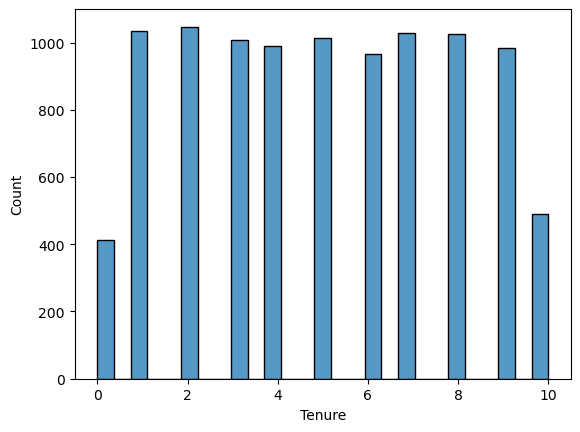

In [1905]:
sns.histplot(bank["Tenure"])

<div style="background-color:#cce7c9; padding: 10px; border-radius: 5px;">

`Tenure` has a mostly uniform distribution except for lower tails at new customers (0) and long customers (10)

<Axes: xlabel='NumOfProducts', ylabel='Count'>

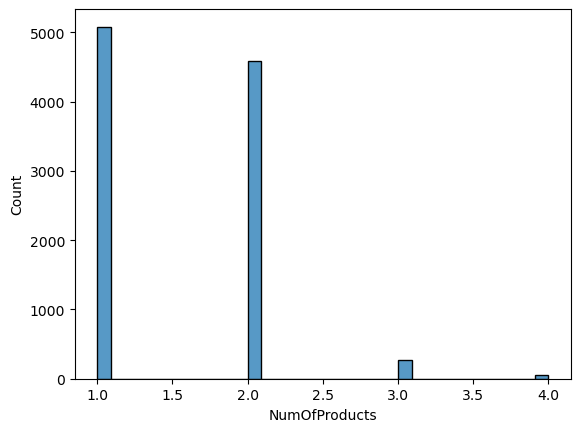

In [1906]:
sns.histplot(bank["NumOfProducts"])

<div style="background-color:#cce7c9; padding: 10px; border-radius: 5px;">

`NumOfProducts` is very skewed. There are few values for 3 or 4 products, so i'm not sure how useful this will be.

### Inspect variables with relation to Churn

In [1907]:
bank["Exited"].value_counts().reset_index()

,Exited,count
0,0,7960
1,1,2037


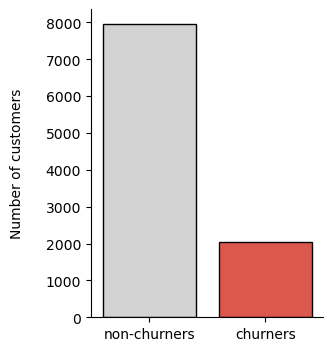

In [1908]:
fig, ax = plt.subplots(figsize = (3,4))

sns.barplot(bank["Exited"].value_counts().reset_index(),
            x = "Exited",
            y = "count",
            hue = "Exited",
            palette = ["lightgrey", "#f44336"],
            legend = False,
            linewidth=1, edgecolor="black")

ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(["non-churners", "churners"])   
ax.set_xlabel("")   

ax.set_ylabel("Number of customers\n")

sns.despine()

<div style="background-color:#d8f9ff; padding: 10px; border-radius: 5px;">

**Observation**

We are dealing with an unbalanced dataset.

From the bank perspective it's great, approximately 80% of our customs have not churned.

From the data science perspective, the difference in sample size can complicate the analysis.


### Region and Gender Churn

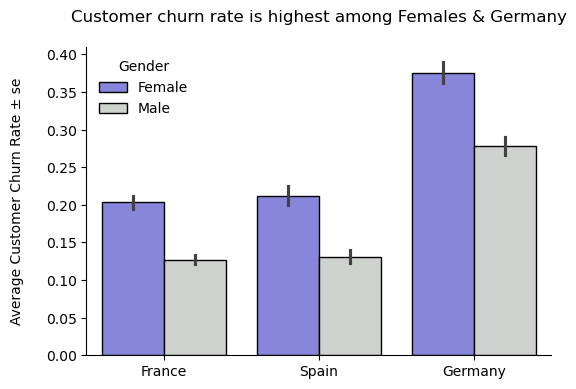

In [1909]:
fig, ax = plt.subplots(figsize = (6,4))

["#614051", "#779eb2"]

sns.barplot(bank,
            x = "Geography",
            y = "Exited",
            hue = "Gender",
            palette = ["#7978e9", "#CED2CC"],
            errorbar= "se",
            linewidth=1, edgecolor="black")

sns.move_legend(ax, loc = "best", frameon=False)

ax.set_title("Customer churn rate is highest among Females & Germany\n")

ax.set_ylabel("Average Customer Churn Rate ± se\n")

ax.set_xlabel(None)

sns.despine()

<div style="background-color:#d8f9ff; padding: 10px; border-radius: 5px;">

**Observation**

Across all regions Female customers are more likely to churn.

German churn rates are higher than other regions, regardless of gender.

### Credit Card Churn

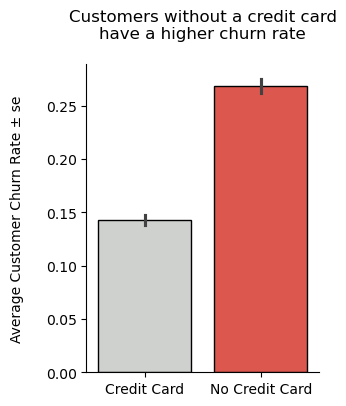

In [1942]:
fig, ax = plt.subplots(figsize = (3,4))

sns.barplot(bank,
            x = "HasCrCard",
            y = "Exited",
            hue = "HasCrCard",
            palette = ["#CED2CC" , "#f44336"],
            errorbar= "se",
            linewidth=1, edgecolor="black")

ax.set_title("Customers without a credit card\nhave a higher churn rate\n")
ax.set_ylabel("Average Customer Churn Rate ± se\n")

ax.set_xlabel(None)
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(["Credit Card", "No Credit Card"])   
ax.set_xlabel("")   

ax.set_ylabel("Average Customer Churn Rate ± se\n")

sns.despine()

<div style="background-color:#d8f9ff; padding: 10px; border-radius: 5px;">

**Observation**

Churn rates are lower among customers with a credit card compared to ones without.

### Active Member Churn

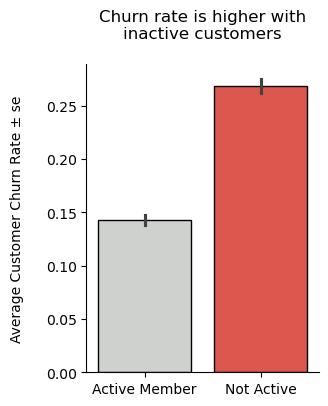

In [1946]:
fig, ax = plt.subplots(figsize = (3,4))

sns.barplot(bank,
            x = "IsActiveMember",
            y = "Exited",
            palette = ["#CED2CC" , "#f44336"],
            hue = "IsActiveMember",
            errorbar= "se",
            linewidth=1, edgecolor="black")

ax.set_title("Churn rate is higher with\ninactive customers\n")
ax.set_ylabel("Average Customer Churn Rate ± se\n")

ax.set_xlabel(None)
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(["Active Member", "Not Active"])   
ax.set_xlabel("")   
ax.set_ylabel("Average Customer Churn Rate ± se\n")

sns.despine()

<div style="background-color:#d8f9ff; padding: 10px; border-radius: 5px;">

**Observation**

Churn rates are lower among active customers. This makes sense, inactive customers are likely to closed accounts.

### Number of Products Churn

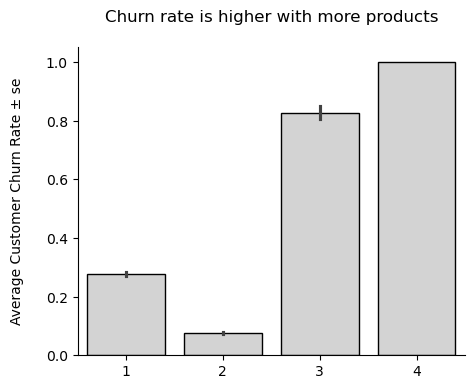

In [1912]:
fig, ax = plt.subplots(figsize = (5,4))

sns.barplot(bank,
            x = "NumOfProducts",
            y = "Exited",
            errorbar= "se",
            color = "lightgrey",
            linewidth=1, edgecolor="black")

ax.set_title("Churn rate is higher with more products\n")
ax.set_ylabel("Average Customer Churn Rate ± se\n")

ax.set_xlabel("")   
ax.set_ylabel("Average Customer Churn Rate ± se\n")

sns.despine()

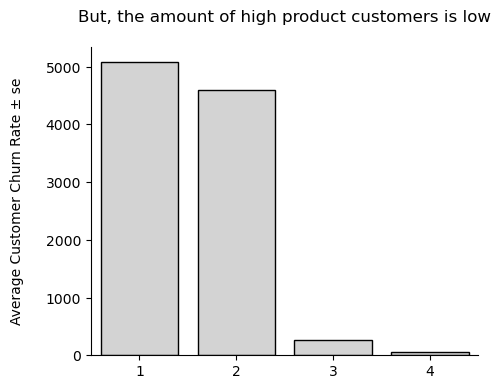

In [1913]:
fig, ax = plt.subplots(figsize = (5,4))

sns.countplot(bank,
            x = "NumOfProducts",
            color = "lightgrey",
            linewidth=1, edgecolor="black")

ax.set_title("But, the amount of high product customers is low\n")
ax.set_ylabel("Average Customer Churn Rate ± se\n")

ax.set_xlabel("")   
ax.set_ylabel("Average Customer Churn Rate ± se\n")

sns.despine()

<div style="background-color:#d8f9ff; padding: 10px; border-radius: 5px;">

**Observation**

This one is interesting. 

Among customers with 3 or 4 objects the churn rates are high, however the number of the these customers overall is very low.

This dataset lacks information on the products, if we knew what products were available and which products each customer had we could probe this more. 

For now it seems the sweet spot (from the bank perspective) is customers with two products.

### Generate boxplots for all numeric values

In [1914]:
bank_cols = bank.select_dtypes(["float", "int"])
bank_cols.drop(["CustomerId", "Exited"], axis = 1, inplace = True)

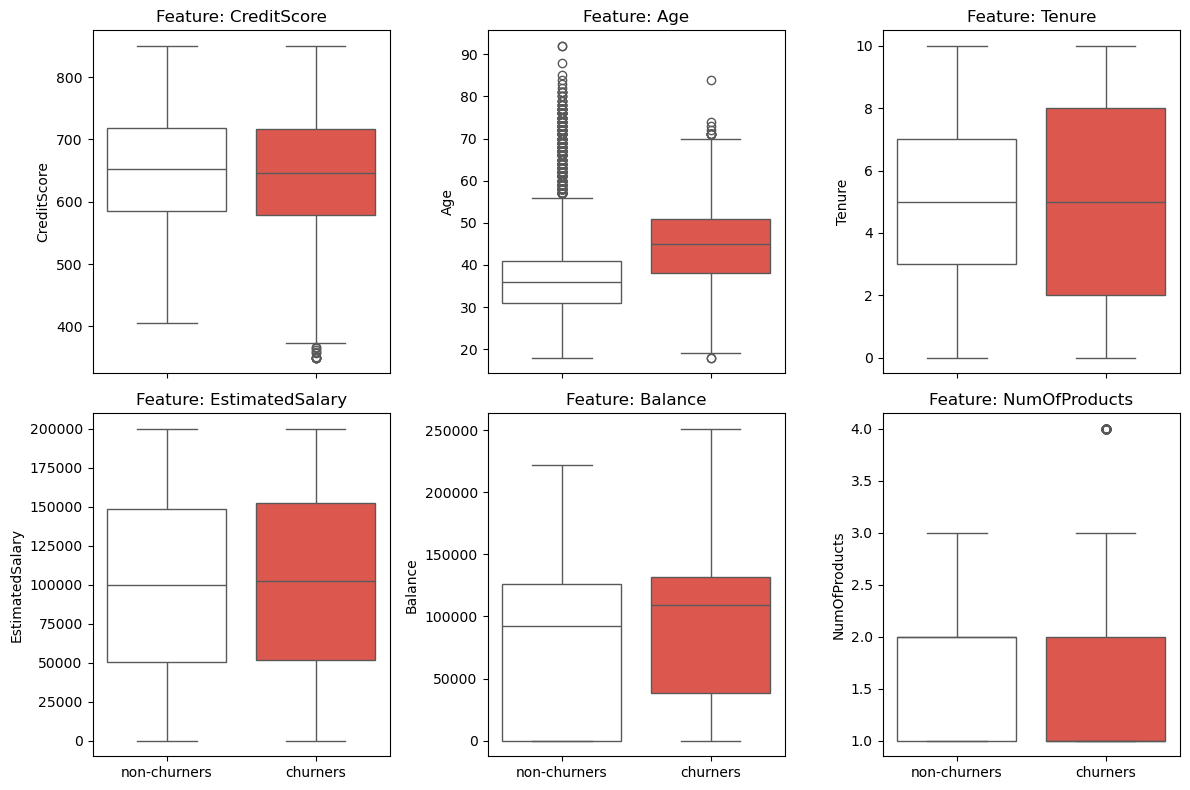

In [1915]:
fig, ax = plt.subplots(2, 3, sharex="all", figsize=(12, 8))

ax = ax.flatten()

for i, axis in zip(bank_cols, ax):
    sns.boxplot(data=bank,
                x="Exited",
                y=i,
                hue = "Exited",
                palette = ["white", "#f44336"], 
                ax = axis,
                legend = False)
    axis.set_title(f"Feature: {i}")
    axis.set_xlabel("")
    ticks = axis.get_xticks()
    axis.set_xticks(ticks)
    axis.set_xticklabels(churn) 

plt.tight_layout()
plt.show();

<div style="background-color:#d8f9ff; padding: 10px; border-radius: 5px;">

**Observation**

`Age` has a trend that may be useful for churn prediction.

`Balance` may have a slight trend that's useful, the medians are different. More non-churners have a 0 balance.

Exited customers have a wider range in `Tenure` than non-churners, this may be interesting for churn prediction.

`CreditScore`, `EstimatedSalary`, and `NumOfProducts` don't seem like good candidates for churn prediction.

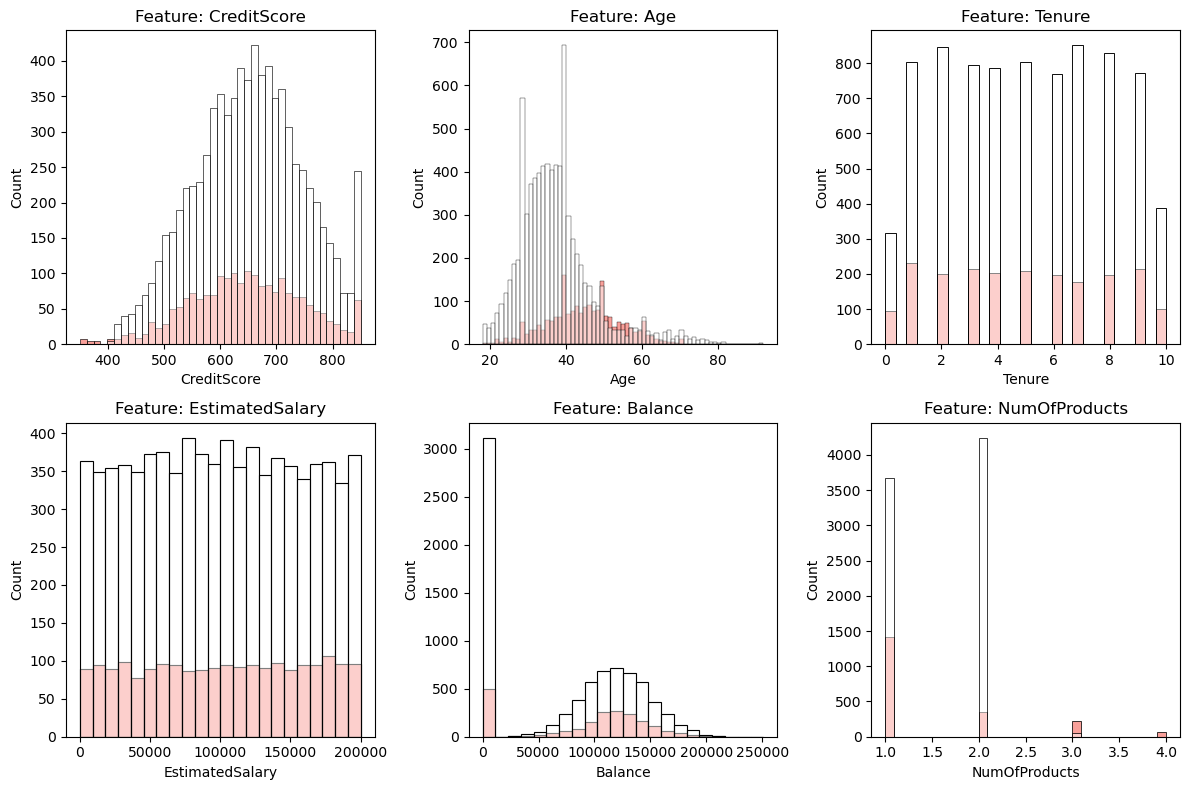

In [1916]:
fig, ax = plt.subplots(2, 3, sharex=False, figsize=(12, 8))

ax = ax.flatten()

for i, axis in zip(bank_cols, ax):
    sns.histplot(data=bank,
                x=i,
                hue = "Exited",
                palette = ["white", "#f44336"], 
                ax = axis,
                legend = False)
    axis.set_title(f"Feature: {i}")

plt.tight_layout()
plt.show();

<div style="background-color:#d8f9ff; padding: 10px; border-radius: 5px;">

**Observation**

For most variables both churner and non-churner customers follow similar distributions.

A noteable excception is `Age`, the median age for churners is higher and appears less skewed. <br>
Both categories display peaks at age decades (30, 40, 50, 60).

`NumOfProducts` appears to have more churned customers with more products. <br>
Again, the number of customers in this NumOfProducts range is so small any conclusions here should be made with caution.

## Part 4 - Feature Engineering

Combining the `Balance` and `EstimatedSalary` metrics into one column could make it a powerful proxy variable for modelling.

In [1917]:
bank.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
2,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1


In [1918]:
bank["balance_v_income"] = bank["Balance"] / bank["EstimatedSalary"]

In [1919]:
bank.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,balance_v_income
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1,0.000000
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0,0.744677
2,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1,1.401375


Of course this new variable has to undergo the usual data inspection steps

<Axes: xlabel='balance_v_income'>

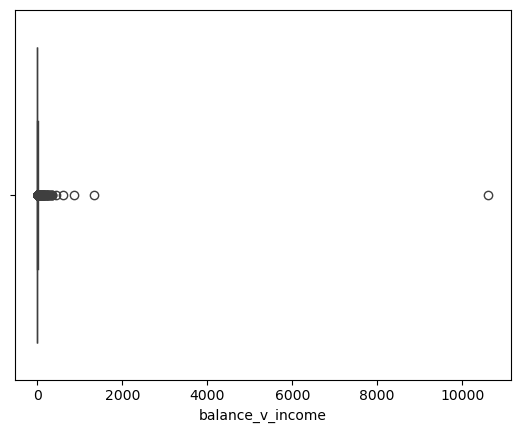

In [1920]:
sns.boxplot(bank, x = "balance_v_income")

Whoa. Alot of outliers on this one.

<Axes: xlabel='balance_v_income'>

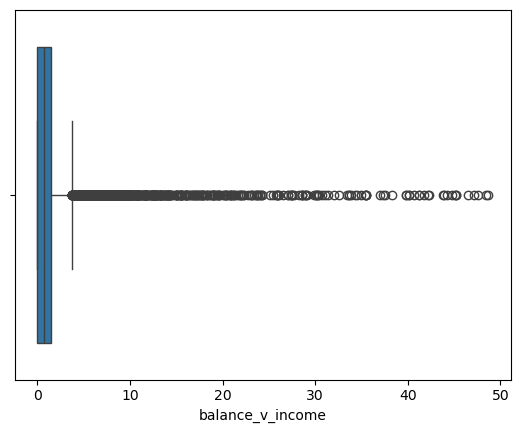

In [1978]:
sns.boxplot(bank.query("balance_v_income < 50"), 
            x = "balance_v_income")

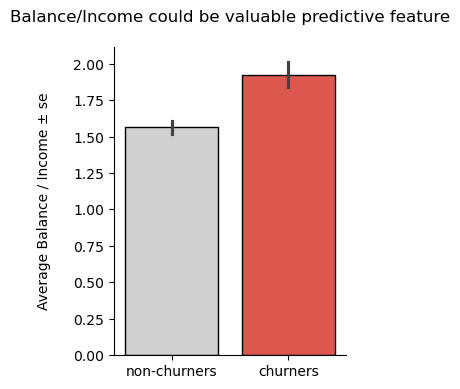

In [1979]:
fig, ax = plt.subplots(figsize = (3,4))

sns.barplot(bank.query("balance_v_income < 50"),
            y = "balance_v_income",
            x = "Exited",
            palette = ["#CED2CC" , "#f44336"],
            hue = "Exited",
            errorbar= "se",
            linewidth=1, edgecolor="black",
            legend = False)

ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(["non-churners", "churners"])   
ax.set_xlabel("")   

ax.set_title("Balance/Income could be valuable predictive feature\n")
ax.set_ylabel("Average Balance / Income ± se\n")

sns.despine()

<div style="background-color:#cce7c9; padding: 10px; border-radius: 5px;">

This variable has alot of outliers.

These high values can make sense though: they indicate customers that have a large balance and a low estimated salary. For example: retired people.

This could be an interesting variable to include in the model.

### Create dataframe for model

The model dataframe has to conform to a certain format.

1. All data should be non-null
2. All variables must be numeric
3. Row granualirity must be correct: In this case each row should indicate one customer

### Drop unnecssary columns

In [1983]:
bank_model = bank.drop(columns = ["CustomerId", "Surname", "EstimatedSalary", "Balance"])

In [1984]:
bank_model.head(3)

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,balance_v_income
0,619,France,Female,42.0,2,1,Yes,Yes,1,0.000000
1,608,Spain,Female,41.0,1,1,Yes,Yes,0,0.744677
2,502,France,Female,42.0,8,3,No,No,1,1.401375


### One-hot encoding for categorical variables

In [1985]:
bank_model = pd.get_dummies(bank_model, dtype=int, drop_first=True)
bank_model.head(3)

,CreditScore,Age,Tenure,NumOfProducts,Exited,balance_v_income,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42.0,2,1,1,0.000000,0,0,0,1,1
1,608,41.0,1,1,0,0.744677,0,1,0,1,1
2,502,42.0,8,3,1,1.401375,0,0,0,0,0


### Variable correlations

In [1986]:
bank_model.corr()

,CreditScore,Age,Tenure,NumOfProducts,Exited,balance_v_income,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
CreditScore,1.000000,-0.004012,0.000657,0.012084,-0.027184,0.006648,0.005623,0.004627,-0.003094,0.025873,0.025873
Age,-0.004012,1.000000,-0.010040,-0.030709,0.285329,0.008836,0.046802,-0.001703,-0.027580,0.085514,0.085514
Tenure,0.000657,-0.010040,1.000000,0.013319,-0.014073,-0.000235,-0.000488,0.003710,0.014515,-0.028165,-0.028165
NumOfProducts,0.012084,-0.030709,0.013319,1.000000,-0.047966,-0.015952,-0.010370,0.009096,-0.021982,0.009697,0.009697
Exited,-0.027184,0.285329,-0.014073,-0.047966,1.000000,0.025555,0.173555,-0.052648,-0.106599,-0.156111,-0.156111
balance_v_income,0.006648,0.008836,-0.000235,-0.015952,0.025555,1.000000,0.027498,-0.011039,0.008382,0.006331,0.006331
Geography_Germany,0.005623,0.046802,-0.000488,-0.010370,0.173555,0.027498,1.000000,-0.332039,-0.024458,-0.020664,-0.020664
Geography_Spain,0.004627,-0.001703,0.003710,0.009096,-0.052648,-0.011039,-0.332039,1.000000,0.016610,0.017028,0.017028
Gender_Male,-0.003094,-0.027580,0.014515,-0.021982,-0.106599,0.008382,-0.024458,0.016610,1.000000,0.022858,0.022858
HasCrCard_Yes,0.025873,0.085514,-0.028165,0.009697,-0.156111,0.006331,-0.020664,0.017028,0.022858,1.000000,1.000000


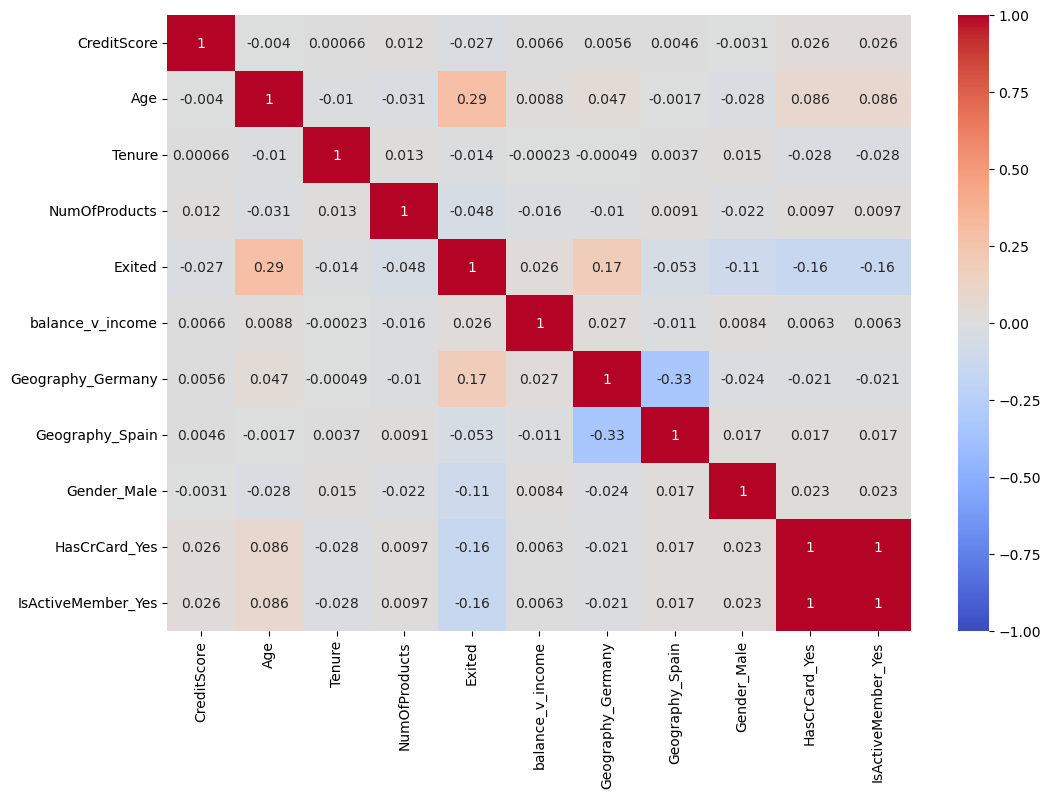

In [1412]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(bank_model.corr(numeric_only=True),
            annot = True,
            cmap = "coolwarm",
            vmin = -1,
            vmax = 1);

<div style="background-color:#d8f9ff; padding: 10px; border-radius: 5px;">

**Observation**

Its a little suspect that `HasCrCard` and `IsActiveMember` are perfectly correlated. <br>
definitely shouldn't use both of these in the model.

`Age`, `Geography_Germany` are weak positive correlations with `Exited`

`HadCrCard`, `Gender_Male`, and `Geography_Spain` are weak negative correlations with `Exited`

## Part 5 - Recommendations

<div style="background-color:#d8f9ff; padding: 10px; border-radius: 5px;">

Without modeling and based on just the EDA the following recommendations can be made:

1. **Encourage credit card products**
    - **Insight**: Customers without credit cards had a higher churn rate
    - **Solution**: Introduce sign-up fee waivers, advertise cash-back rewards

2. **Focus on high-risk demographic areas**

    - **Insight**: Germany has high churn rates
    - **Insight**: Females had a higher churn rate than males
    - **Solution**: Targeted advertising or benefits for German customers, and females of all regions.

3. **Increase focus on high-balance customers**
    - **Insight**: Customers with a high balance had higher churn rates
    - **Solution**: Introduce benefits for high balance customers, for example waiving fees at certain balance amount, offering financial advisor services.

These recommendations could prove customer retention and therefore reduce churn.



## Part 6 - Future Work

At this point the dataset is ready to start developing a model for predicting customer churn.

You can approach this problem in a different ways (1) logistic regression or (2) classification models.

For either one, the next step will be the split the model into training (80%) and test (20%) sets.

Cross-validation will be used to verify the training set before testing.